In [56]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as cst
import sys, os

sys.path.append(os.getcwd() + '/../camb')
import utils as ut
import props as p
import lines as l

from astropy.cosmology import Planck18 as cosmo
H0 = cosmo.H0.value
h = cosmo.h
lilh = True

TIM = p.TIM
FYST = p.FYST
LADUMA = p.LADUMA

In [57]:
# TIM
bins = [
    ut.zBin(TIM.SW.zmin, TIM.SW.zmax),
    ut.zBin(TIM.LW.zmin, TIM.LW.zmax),
]
bands = ['SW', 'LW']

LSbins = [ut.Survey(b, TIM[band].ins, TIM.Daz, TIM.Del, lilh) for b, band in zip(bins, bands)]

In [ ]:
k_xyz_modes = [lsb.k_modes() for lsb in LSbins]
# k_xyz_modes[N] where N is the survey bin
# each element is a 4D array of shape (3, Nkx, Nky, Nkz)

k_mags = [np.sqrt(np.sum(kxyzs**2, axis=0)) for kxyzs in k_xyz_modes] 
k_mins = [np.min(km[km != 0]) for km in k_mags]
k_maxs = [np.max(km) for km in k_mags]
k_props = [np.abs(kxyzs / km) for kxyzs, km in zip(k_xyz_modes, k_mags)]

# parallel and perpendicular components
k_para = [np.abs(kxyzs[2]) for kxyzs in k_xyz_modes]
k_perp = [np.sqrt(kxyzs[0]**2 + kxyzs[1]**2) for kxyzs in k_xyz_modes]
kxs = [kxyzs[0] for kxyzs in k_xyz_modes]
kys = [kxyzs[1] for kxyzs in k_xyz_modes]
kzs = [kxyzs[2] for kxyzs in k_xyz_modes]

# mu = cos theta
mu = [kxyzs[2] / km for kxyzs, km in zip(k_xyz_modes, k_mags)]
mux = [kxyzs[0] / km for kxyzs, km in zip(k_xyz_modes, k_mags)]
muy = [kxyzs[1] / km for kxyzs, km in zip(k_xyz_modes, k_mags)]

C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\1211273886.py:8: RuntimeWarning: invalid value encountered in divide
  k_props = [np.abs(kxyzs / km) for kxyzs, km in zip(k_xyz_modes, k_mags)]
C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\1211273886.py:18: RuntimeWarning: invalid value encountered in divide
  mu = [kxyzs[2] / km for kxyzs, km in zip(k_xyz_modes, k_mags)]
C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\1211273886.py:19: RuntimeWarning: invalid value encountered in divide
  mux = [kxyzs[0] / km for kxyzs, km in zip(k_xyz_modes, k_mags)]
C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\1211273886.py:20: RuntimeWarning: invalid value encountered in divide
  muy = [kxyzs[1] / km for kxyzs, km in zip(k_xyz_modes, k_mags)]


C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\536413950.py:3: RuntimeWarning: divide by zero encountered in log10
  h = ax[i].hist2d(np.log10(k_mags[i].flatten()), mu[i].flatten(), bins=25, norm=plt.cm.colors.LogNorm(),


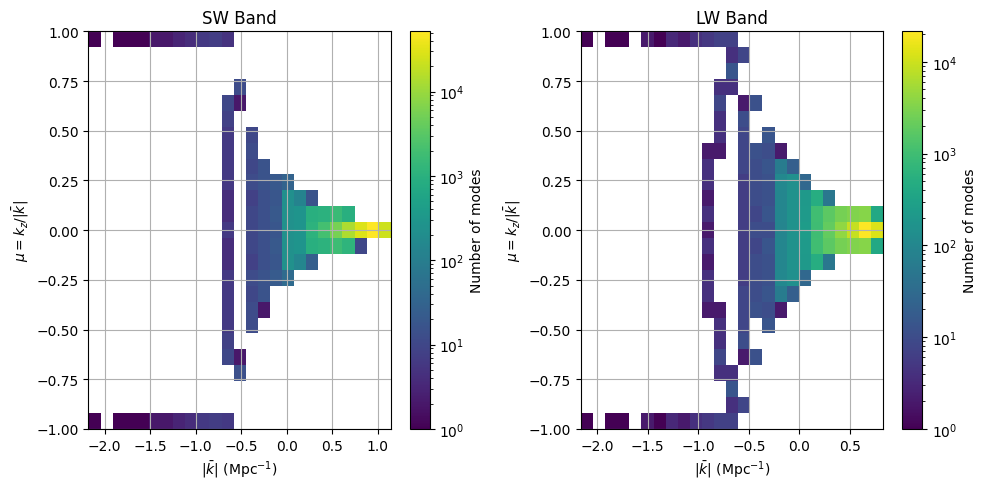

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    h = ax[i].hist2d(np.log10(k_mags[i].flatten()), mu[i].flatten(), bins=25, norm=plt.cm.colors.LogNorm(),
                    range=[np.log10([k_mins[i], k_maxs[i]]), [-1, 1]],
                    cmap='viridis', cmin=1)
    ax[i].set_xlabel(r'$|\bar k|$ (Mpc$^{-1}$)')
    ax[i].set_ylabel(r'$\mu = k_z / |\bar k|$')
    ax[i].set_title(f'{bands[i]} Band')
    ax[i].set_aspect('auto')
    ax[i].grid(True)
    fig.colorbar(h[3], ax=ax[i], label='Number of modes')
    
plt.tight_layout()
# plt.show()
plt.savefig('../figs/kz_nmodes.png', dpi=300, bbox_inches='tight')

C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\997504954.py:3: RuntimeWarning: divide by zero encountered in log10
  h = ax[i].hist2d(np.log10(k_mags[i].flatten()), mux[i].flatten(), bins=25, norm=plt.cm.colors.LogNorm(),


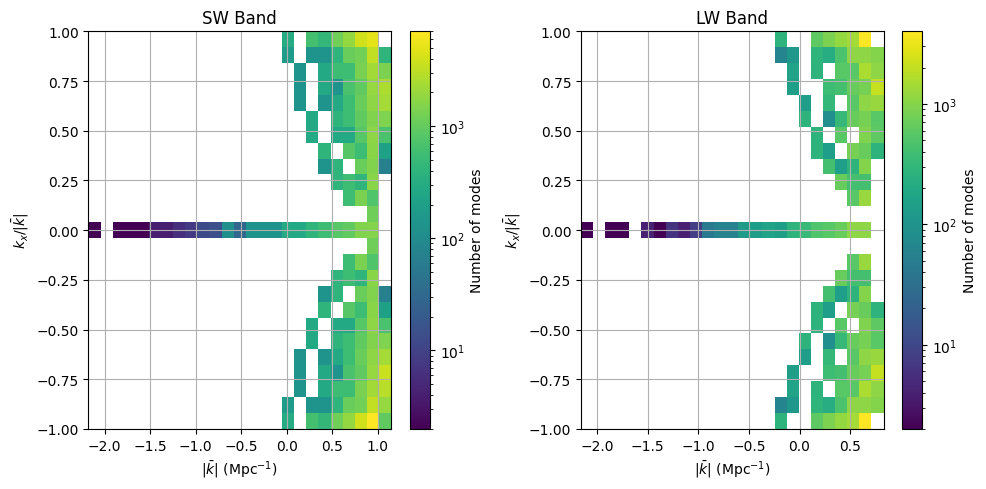

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    h = ax[i].hist2d(np.log10(k_mags[i].flatten()), mux[i].flatten(), bins=25, norm=plt.cm.colors.LogNorm(),
                    range=[np.log10([k_mins[i], k_maxs[i]]), [-1, 1]],
                    cmap='viridis', cmin=1)
    ax[i].set_xlabel(r'$|\bar k|$ (Mpc$^{-1}$)')
    ax[i].set_ylabel(r'$k_x / |\bar k|$')
    ax[i].set_title(f'{bands[i]} Band')
    ax[i].set_aspect('auto')
    ax[i].grid(True)
    fig.colorbar(h[3], ax=ax[i], label='Number of modes')
    
plt.tight_layout()
# plt.show()
plt.savefig('../figs/kx_nmodes.png', dpi=300, bbox_inches='tight')

C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\3672477846.py:3: RuntimeWarning: divide by zero encountered in log10
  h = ax[i].hist2d(np.log10(k_mags[i].flatten()), muy[i].flatten(), bins=25, norm=plt.cm.colors.LogNorm(),


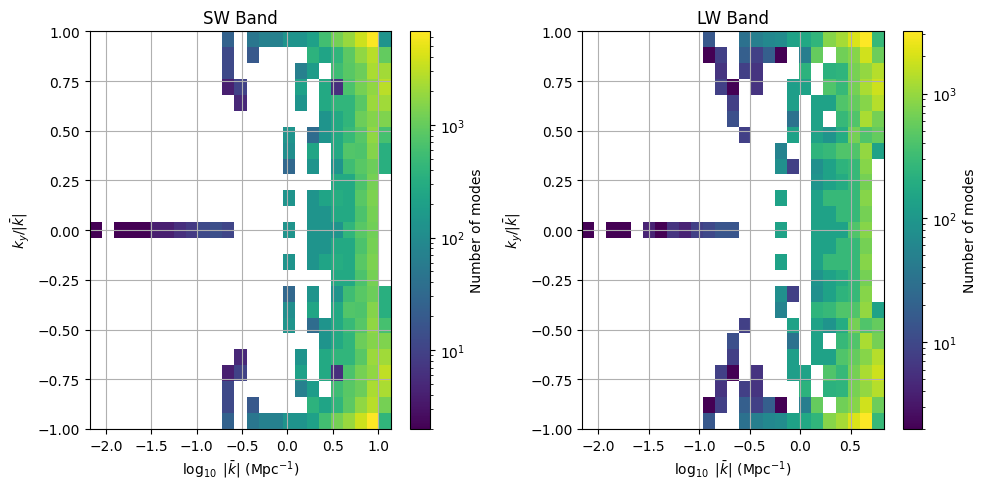

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    h = ax[i].hist2d(np.log10(k_mags[i].flatten()), muy[i].flatten(), bins=25, norm=plt.cm.colors.LogNorm(),
                    range=[np.log10([k_mins[i], k_maxs[i]]), [-1, 1]],
                    cmap='viridis', cmin=1)
    ax[i].set_xlabel(r'$\log_{10}$ $|\bar k|$ (Mpc$^{-1}$)')
    ax[i].set_ylabel(r'$k_y / |\bar k|$')
    ax[i].set_title(f'{bands[i]} Band')
    ax[i].set_aspect('auto')
    ax[i].grid(True)
    fig.colorbar(h[3], ax=ax[i], label='Number of modes')
    
plt.tight_layout()
# plt.show()
plt.savefig('../figs/ky_nmodes.png', dpi=300, bbox_inches='tight')

C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\17657909.py:4: RuntimeWarning: invalid value encountered in divide
  sc = ax[i].scatter(k_mags[i].flatten(), mu[i].flatten(), c=(kxs[i].flatten() / k_mags[i].flatten()),


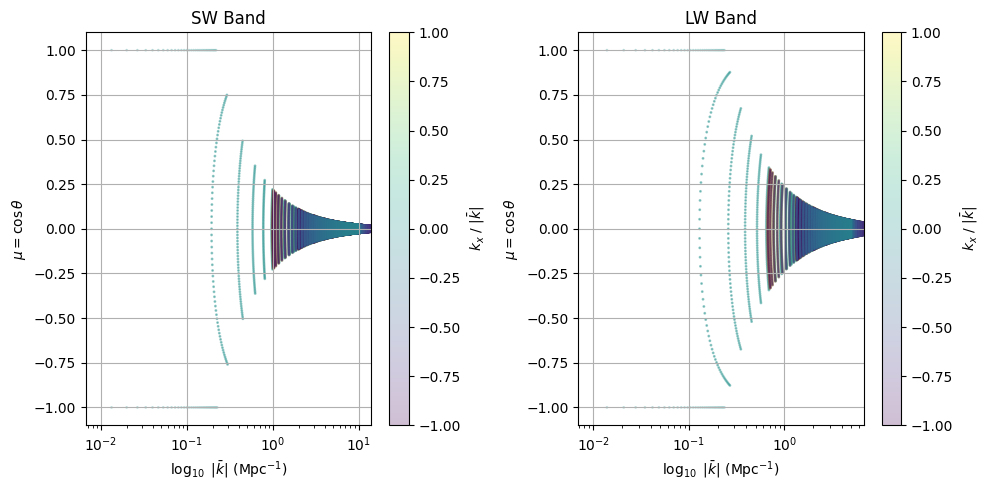

In [ ]:
# plot same as above, but as a scatter plot, and kxs as colors
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    sc = ax[i].scatter(k_mags[i].flatten(), mu[i].flatten(), c=(kxs[i].flatten() / k_mags[i].flatten()),
                        cmap='viridis', s=1, alpha=0.25)
    ax[i].set_xlabel(r'$\log_{10}$ $|\bar k|$ (Mpc$^{-1}$)')
    ax[i].set_ylabel(r'$\mu = \cos \theta$')
    ax[i].set_title(f'{bands[i]} Band')
    ax[i].set_xlim(k_mins[i], k_maxs[i])
    ax[i].set_xscale('log')
    ax[i].set_ylim(-1.1, 1.1)
    ax[i].set_aspect('auto')
    ax[i].grid(True)
    fig.colorbar(sc, ax=ax[i], label=r'$k_x$ / $|\bar k|$')
plt.tight_layout()
# plt.show()
plt.savefig('../figs/mudist_scatter_kx.png', dpi=300, bbox_inches='tight')

C:\Users\shubh\AppData\Local\Temp\ipykernel_14168\1230665226.py:4: RuntimeWarning: invalid value encountered in divide
  sc = ax[i].scatter(k_mags[i].flatten(), mu[i].flatten(), c=(kys[i].flatten() / k_mags[i].flatten()),


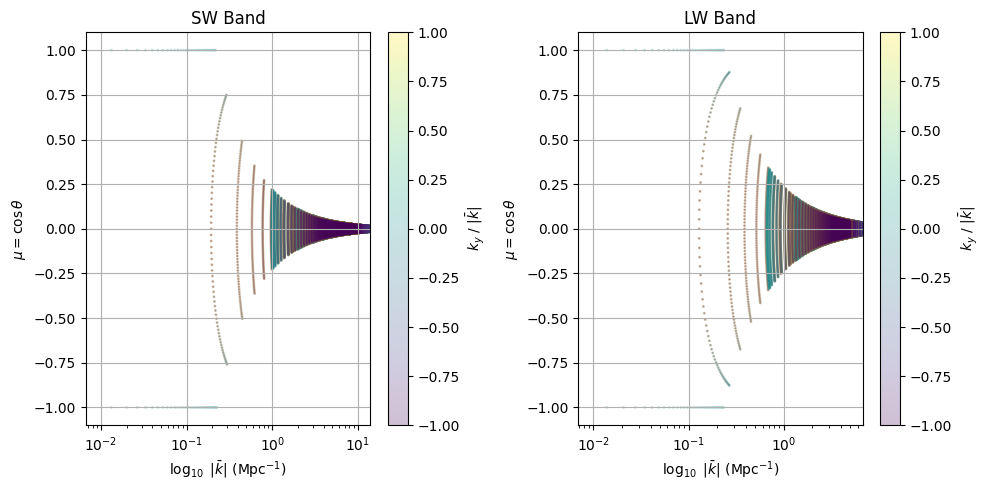

In [63]:
# plot same as above, but as a scatter plot, and kys as colors
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    sc = ax[i].scatter(k_mags[i].flatten(), mu[i].flatten(), c=(kys[i].flatten() / k_mags[i].flatten()),
                        cmap='viridis', s=1, alpha=0.25)
    ax[i].set_xlabel(r'$\log_{10}$ $|\bar k|$ (Mpc$^{-1}$)')
    ax[i].set_ylabel(r'$\mu = \cos \theta$')
    ax[i].set_title(f'{bands[i]} Band')
    ax[i].set_xlim(k_mins[i], k_maxs[i])
    ax[i].set_xscale('log')
    ax[i].set_ylim(-1.1, 1.1)
    ax[i].set_aspect('auto')
    ax[i].grid(True)
    fig.colorbar(sc, ax=ax[i], label=r'$k_y$ / $|\bar k|$')
plt.tight_layout()
# plt.show()
plt.savefig('../figs/mudist_scatter_ky.png', dpi=300, bbox_inches='tight')

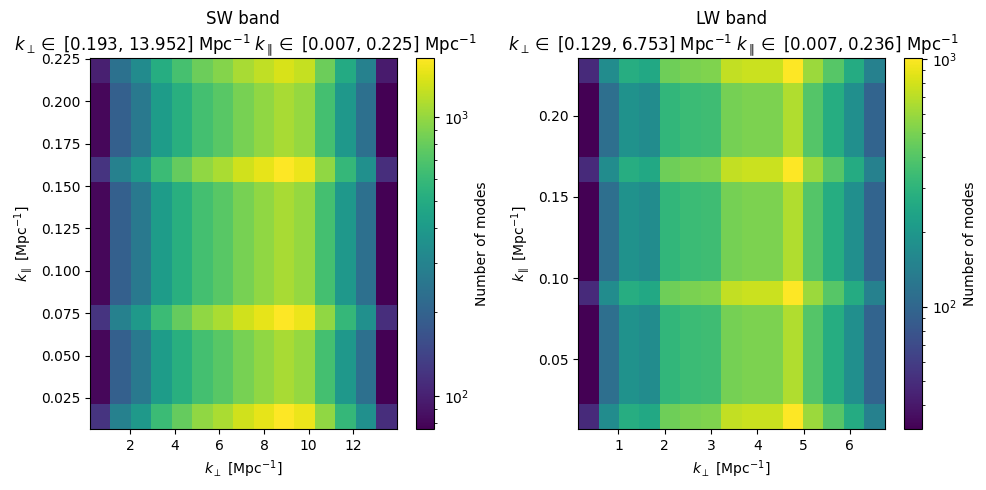

In [64]:
# plot 2d histograms of k_para vs k_perp
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    # sanitize inf and nan values
    mask = np.logical_and(k_para[i] != 0, k_perp[i] != 0)
    # mask = True
    minperp = np.nanmin(k_perp[i][mask])
    minpara = np.nanmin(k_para[i][mask])
    maxperp = np.nanmax(k_perp[i][mask])
    maxpara = np.nanmax(k_para[i][mask])
    # k_perp[i][~np.isfinite(k_perp[i])] = 0
    # k_para[i][~np.isfinite(k_para[i])] = 0

    # minperp, maxperp = .999, 1
    # minpara, maxpara = 0, .1

    h = ax[i].hist2d(k_perp[i].flatten(), k_para[i].flatten(), bins=15, norm=plt.cm.colors.LogNorm(),
                    range=[[minperp, maxperp], [minpara, maxpara]], cmap='viridis')
    ax[i].set_title(f'{bands[i]} band\n' r"$\; k_{\perp} \in$" f' [{minperp:.3f}, {maxperp:.3f}] Mpc$^{{-1}}$' +
                    r"$\; k_{\parallel} \in$" f' [{minpara:.3f}, {maxpara:.3f}] Mpc$^{{-1}}$')
    ax[i].set_xlabel(r'$k_{\perp}$ [Mpc$^{-1}$]')
    ax[i].set_ylabel(r'$k_{\parallel}$ [Mpc$^{-1}$]')
    # ax[i].set_xscale('log')
    # ax[i].set_yscale('log')
    ax[i].set_xlim(minperp, maxperp)
    ax[i].set_ylim(minpara, maxpara)
    fig.colorbar(h[3], ax=ax[i], label='Number of modes')
plt.tight_layout()
# plt.show()
plt.savefig('../figs/mudist_kperp_kpara.png', dpi=300, bbox_inches='tight')

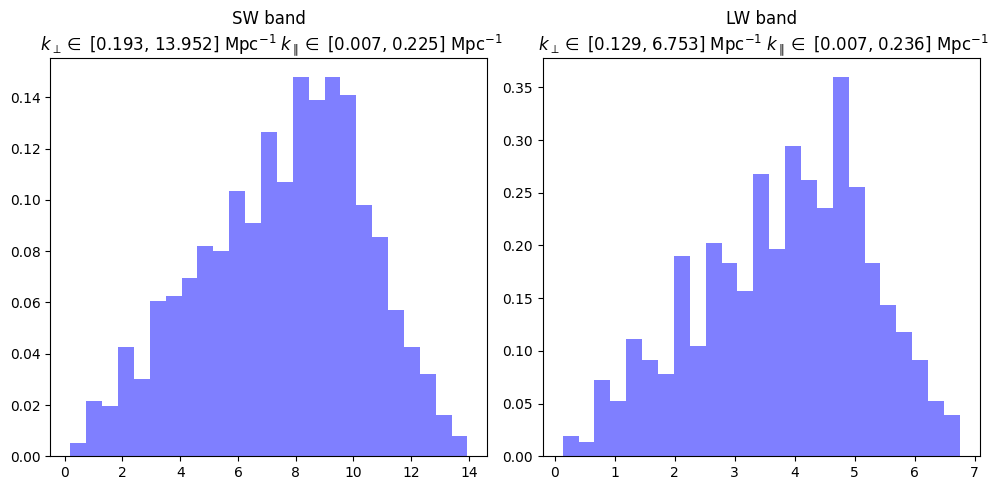

In [65]:
# plot 1d histograms of k_para vs k_perp
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    # sanitize inf and nan values
    mask = np.logical_and(k_para[i] != 0, k_perp[i] != 0)
    # mask = True
    minperp = np.nanmin(k_perp[i][mask])
    minpara = np.nanmin(k_para[i][mask])
    maxperp = np.nanmax(k_perp[i][mask])
    maxpara = np.nanmax(k_para[i][mask])
    # k_perp[i][~np.isfinite(k_perp[i])] = 0
    # k_para[i][~np.isfinite(k_para[i])] = 0

    # minperp, maxperp = .999, 1
    # minpara, maxpara = 0, .1

    # h = ax[i].hist(k_para[i].flatten(), bins=25, density=True, 
    #                range=[minpara, maxpara], color='blue', alpha=0.5, label=r'$k_{\para}$')
    h = ax[i].hist(k_perp[i].flatten(), bins=25, density=True, 
                   range=[minperp, maxperp], color='blue', alpha=0.5, label=r'$k_{\perp}$')
    ax[i].set_title(f'{bands[i]} band\n' r"$\; k_{\perp} \in$" f' [{minperp:.3f}, {maxperp:.3f}] Mpc$^{{-1}}$' +
                    r"$\; k_{\parallel} \in$" f' [{minpara:.3f}, {maxpara:.3f}] Mpc$^{{-1}}$')
    # ax[i].set_xlabel(r'$k_{\perp}$ [Mpc$^{-1}$]')
    # ax[i].set_ylabel(r'$k_{\parallel}$ [Mpc$^{-1}$]')
    # ax[i].set_xscale('log')
    # ax[i].set_yscale('log')
    # ax[i].set_xlim(minperp, maxperp)
    # ax[i].set_ylim(minpara, maxpara)
    # fig.colorbar(h[3], ax=ax[i], label='Number of modes')
plt.tight_layout()
plt.show()